In [27]:
import sklearn.datasets
import numpy as np
import plotly.express as px
import plotly.graph_objects as po
from sklearn.decomposition import PCA     
import matplotlib.pyplot as plt
import scipy

In [40]:
#Load Swiss Roll Data 
X,c=sklearn.datasets.make_swiss_roll(n_samples=800,random_state=1234)
print(X.shape)

(800, 3)


In [262]:
#Plot Data
fig=px.scatter_3d(x=X.T[0], y=X.T[1], z=X.T[2], color=c,
              color_continuous_scale=px.colors.sequential.Rainbow)
fig.show()

fig.write_image("swis.png")

AttributeError: 'Figure' object has no attribute 'save'

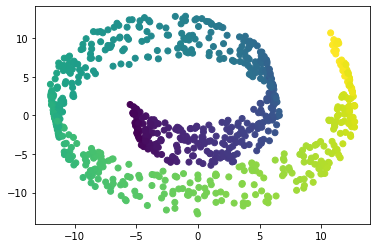

In [263]:
#Conduct and plot PCA
pca = PCA(n_components=2 )
pCs = pca.fit_transform(X)
plt.scatter(x=pCs.T[0], y=pCs.T[1], c=c)
plt.savefig('pca.png')

Because PCA uses euklidean distance as error which it minimizes, the form of the data which in the third dimensions is kept. We don't have the effect of unfolding which we would like to achieve with ISOMAP.

In [201]:
#Returns euklidean Distance
def distance(x1,x2):
    return np.abs(x1[0]-x2[0])+np.abs(x1[1]-x2[1])+np.abs(x1[2]-x2[2])

In [202]:
#Returns weight Matrix from Swiss_Roll_Data
def get_weight_Matrix(X,c):   
    D= np.zeros((len(c),len(c)))
    for i1,x1 in enumerate(X):
        for i2, x2 in enumerate(X):
            D[i1,i2]=distance(x1,x2)
    return D

In [241]:
#Checks if Matrix is symmetrix
def check_symmetrie(M):
    return (not np.any(M-M.T))

In [204]:
#Takes an integer k and a weight Matrix D and returns a k nearest neighbor graph
def k_nearest_neighbors_graph(k, D):
    W = np.matrix(np.ones((len(c),len(c))) * 1000000)
    for i in range(len(c)):
        W[i,i]=0
    for i, w1 in enumerate(D):
        for j in np.argsort(w1)[1:k+1]:
            W[i, j] = w1[j]
    return W

In [205]:
#Takes a real number epsilon and a weight matrix D and returns an epsilon graph
def get_epsilon_graph(epsilon, D):
    W = np.matrix(np.ones((len(c),len(c))) * 1000000)
    for i in range(len(c)):
        W[i,i]=0
    for i, w1 in enumerate(D):
        for j in np.argsort(w1)[1:]:
            if(w1[j]<=epsilon):
                W[i, j] = w1[j]
            else:
                break
    return W

In [224]:
#Calculates all pairs shortest paths
def floyd_warshall(W):   
    D = W.copy()
    n = D.shape[0]
    for k in range(n):
        for i in range(n):
            D[i,:] = np.minimum(D[i,:], D[i,k]+D[k,:])
    return D

In [226]:
def getCenteringMatrix(n):
    return np.eye(n)-(np.ones((n,n))/n)

In [255]:
def MDS(D,d):
    #Step 1 Calculate Centering Matrix
    H= getCenteringMatrix(len(D_norm))
    #Calculate Gramm Matrix
    G = -(H@(D)@H)/(2)
    #Eigenvectordecomposition of G
    lam,vec=np.linalg.eigh(G)
    lam = lam[:-d-1:-1]
    
    Vec=vec[:,:-d-1:-1]
    #Calculate new X
    return(np.diag(np.sqrt(lam))@Vec.T)

k-nearest neighbour Symmetric: False
Epsilon Symmetric: True
Result for k-nearest neighbour with k= 5


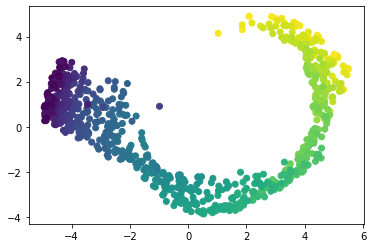

Result for Epsilon Graph with epsilon= 50


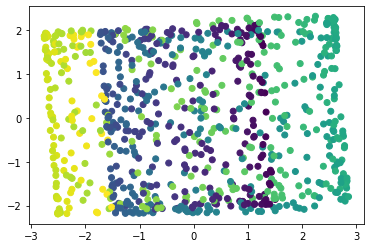

In [265]:
def fullMDS(X, k , epsilon):
    D=get_weight_Matrix(X,c)
    W1 = k_nearest_neighbors_graph(k, D)
    W2 = get_epsilon_graph(epsilon, D)
    #Check if the algortihms work
    print("k-nearest neighbour Symmetric:",check_symmetrie(W1))
    print("Epsilon Symmetric:",check_symmetrie(W2))
    
    #Get all shortest paths
    D1=floyd_warshall(W1)
    D2=floyd_warshall(W2)
    
    #Apply MDS to k nearest neighbour Graph
    X_new=MDS(D1,2)
    x_1=np.array(X_new)[0]
    x_2= np.array(X_new)[1]
    #Plot Results
    print("Result for k-nearest neighbour with k=",k)
    plt.scatter(x=x_1, y=x_2, c=c)
    plt.savefig('k.png')
    plt.show()
    
    #Apply MDS to Epsilon Graph
    X_new=MDS(D2,2)
    x_1=np.array(X_new)[0]
    x_2= np.array(X_new)[1]
    print("Result for Epsilon Graph with epsilon=",epsilon)
    plt.scatter(x=x_1, y=x_2, c=c)
    plt.savefig('epsilon.png')
    plt.show()

fullMDS(X,5,50)   

we can recognize a clear improvement compared to PCA for both k and Epsilon. We are aware of the fact, that in our code in the function MDS we dont square D. But squaring D resulted in negative lambdas and thus a non real square root, we decided to solve it this way, since the results aren't to bad. We would be grateful to get to know what we missed in the correction, thank you !